In [1]:
%matplotlib inline
!pip install squarify

import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import squarify

print("done")


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


done


# Problem Statement:
You work for a retail bank, and the bank is concerned about customer churn, particularly among its credit card holders. Your task is to analyse the factors influencing customer churn and build a predictive model to identify customers at risk of churning.

## Dataset:
You have a dataset containing information about credit card customers, including their credit score, country, gender, age, tenure with the bank, account balance, number of products they hold with the bank, whether they have a credit card, whether they are an active member, their estimated salary, and whether they have churned.

## Analysis Objective:
Using multivariate regression analysis, identify the factors that significantly influence customer churn among credit card holders. This analysis aims to understand the relative importance of different predictors in determining churn and to build a predictive model for churn prediction.

## Approach:

- Data Preparation: Preprocess the dataset by handling missing values, encoding categorical variables, and scaling numerical features if necessary.
  
- Multivariate Regression Analysis: Perform multivariate regression analysis with customer churn as the dependent variable and other uncovered relevant features as independent variables. Identify which predictors have significant effects on churn and estimate their impact.

  
- Model Evaluation: Evaluate the performance of the regression model using appropriate metrics (e.g., R-squared, adjusted R-squared, AIC, BIC).

- Consider model assumptions and diagnostics to ensure the validity of the results.
 
- Interpretation: Interpret the coefficients of the regression model to understand the direction and magnitude of the relationships between predictors and churn.

- Identify the most influential factors affecting churn among credit card customers using multivariate regression analysis to provide insights into the factors driving customer churn among credit card holders in the bank's customer base.


In [2]:
# problem 
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 12)

In [4]:
df.info()
# no missing values and data types appear correct (This is obviously unrealistic of a real-world data set!)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.corr()['churn'] 

customer_id        -0.006248
credit_score       -0.027094
age                 0.285323
tenure             -0.014001
balance             0.118533
products_number    -0.047820
credit_card        -0.007138
active_member      -0.156128
estimated_salary    0.012097
churn               1.000000
Name: churn, dtype: float64

<Axes: >

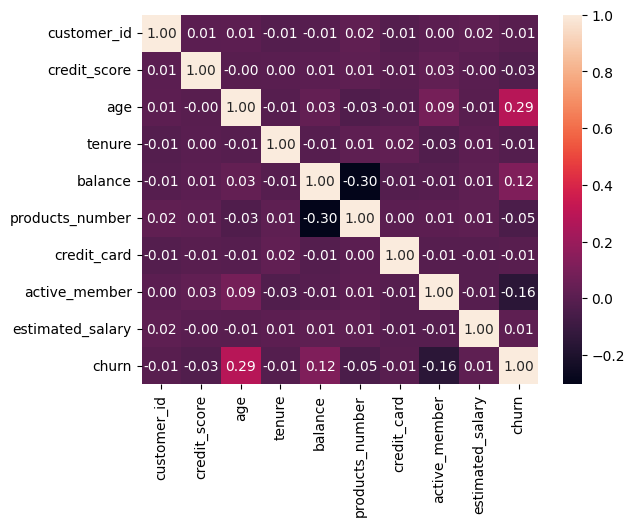

In [6]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
# weak positive correlation for age and negligable positive correlation for balance and estimated salary against Churn.
# A weak negative correlation for active member and a negligable negative correlation for credit score, tenure, products number and credit card.

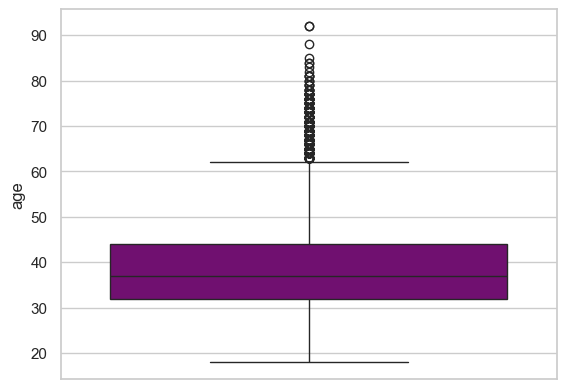

In [52]:
sns.boxplot(df['age'], color='purple')
df['age'].describe()
IQR = 44-32
upper_whisker = 44 + 1.5 * IQR

<Axes: xlabel='estimated_salary', ylabel='Count'>

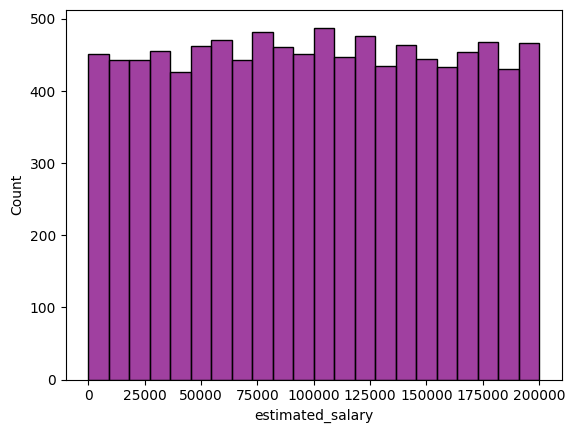

In [8]:
# sns.boxplot(df['estimated_salary'])
sns.histplot(df['estimated_salary'], color='purple')

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64

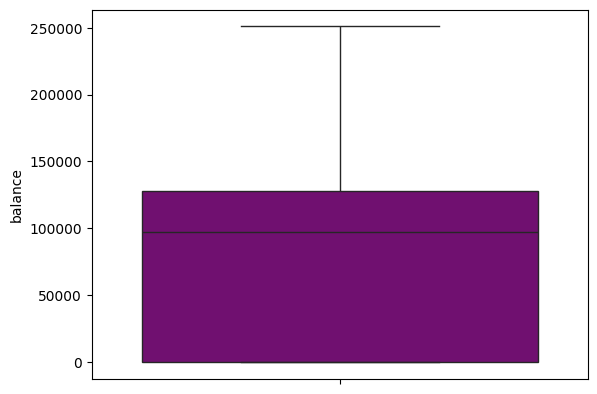

In [9]:
sns.boxplot(df['balance'], color='purple')
df['balance'].describe()

<Axes: ylabel='active_member'>

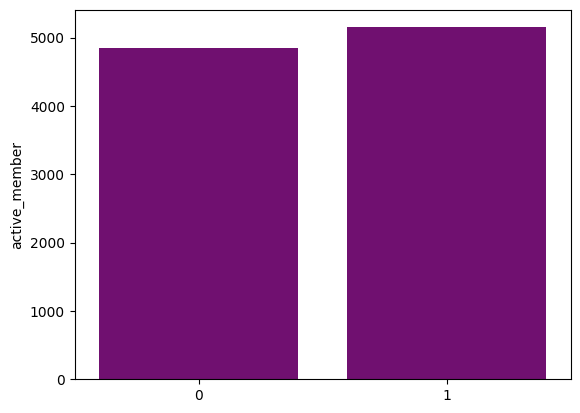

In [10]:
sns.barplot(df['active_member'].value_counts(), color='purple')

<Axes: xlabel='credit_score', ylabel='Count'>

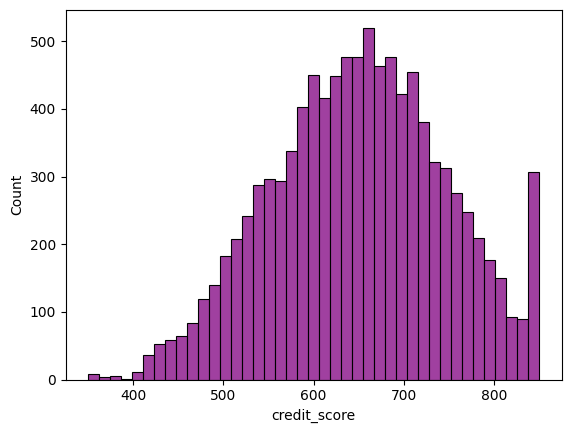

In [11]:
# sns.boxplot(df['credit_score'])
df['credit_score'].describe()
sns.histplot(df['credit_score'], color='purple')

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: tenure, dtype: float64

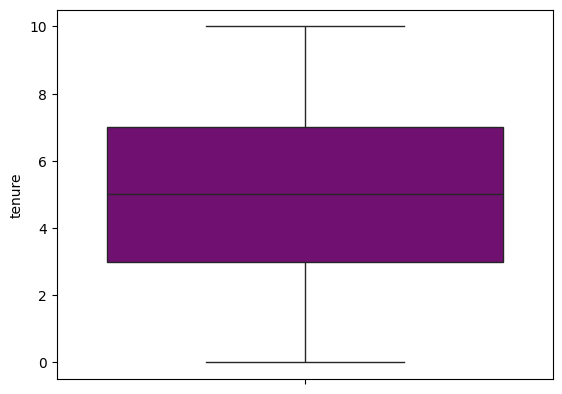

In [12]:
sns.boxplot(df['tenure'], color='purple')
df['tenure'].describe()

<Axes: ylabel='products_number'>

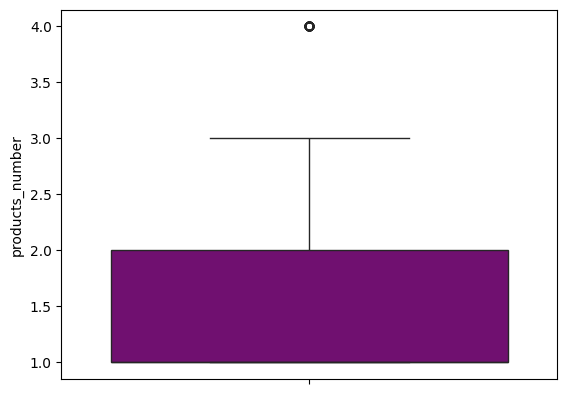

In [13]:
sns.boxplot(df['products_number'], color='purple')

<Axes: ylabel='credit_card'>

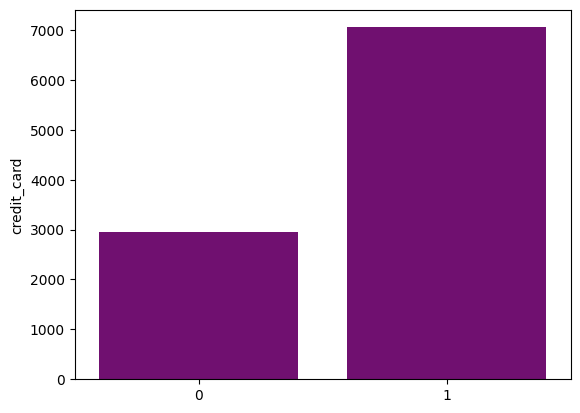

In [14]:
sns.barplot(df['credit_card'].value_counts(), color='purple')

# Preliminary Explorative Insights
The predictor of age within the dataset has a median of 38.9 years, with 50% of data points between 32 (Q1) and 44 years (Q3), however there may be many outliers for customer age within the dataset. 

Very Even distribution of a estimated salary count for customers, This could indicate wide target audience. 

Mean balance of $76,485, could be interpreted both positively or negatively. The Bank does on one hand have increased Liquidity for investing and lending and potential high customer retention. However, this could also mean higher interest expenses and idle funds. 

When also considering that a higher number of customers are inactive then active, this could point towards the more negative implications of high average customer balance being true (though the figures are not too dissimilar). 

The credit scores of customers displays a mean of 650.5. Given the capital within the current dataset is in USD, the credit scores will be interpreted using the United States FICO Scoring System.

FICO Bracket Interpretations (ranges from 300 to 850):
***
###### Excellent: 800 to 850
***
###### Very Good: 740 to 799
***
###### Good: 670 to 739
***
###### Fair: 580 to 669
***
###### Poor: 300 to 579
***

Thus the majority of customers within the dataset are of 'fair' credit scores. Conversely, There is also some clear outliers within the dataset that fall into the 'Poor' bracket. This could be an indication of a business imitative proposed by the bank such as subprime lending or a credit repair programme. When observing a Histogram distribution, negative skew can be seen, which is less indicative of the former mentioned initiatives.

Customer tenure appears normally distributed, with a mean of 5.01 years. 

The number of products utilised by customers sits on average at around 1 (with up to 4 products being on offer). When coupled with the fact a significantly greater number of customers have a credit card with the bank than do not, this would suggest that that credit cards is the primary product of interest for customers. This is of use given the Bank being analysed wants particular focus towards customers who use credit cards. 

When looking at the boxplots of certain metrics (age,  credit score and product number) there may be some need to outlier detection and removal.
Further, there is clearly a much higher number of customers within the dataset who have a credit card, and so indicates that it is a popular product with the current bank being analysed and could provide opportunity to upsell other products given that customers appear receptive to such products. Thus, this predictor may be an area which I focus on more heavily, despite the aforementioned negligible negative Pearson correlation score. 

In [15]:
age_outliers = df[df['age'] > upper_whisker]
print(f" There are {age_outliers.shape[0]} age outliers (above upper-quartile exclusively), of the 10,000 data points")

 There are 359 age outliers (above upper-quartile exclusively), of the 10,000 data points


Although 3.59% of customers appear to have an outlying age, it has been decied upon to leave these values in as these datapoints can be treated as genuine (no greater 92 years). This may have some impact later on, namely on model performance however the noise/bias caused from this should not be significant when performing multivariate regression analysis.

#### In summary when examining the correlation heatmap, it seems of benefit to isolate variables such as age, balance, and customer activity status concerning customer churn. This focused analysis aims to gain insight into any underlying trends or patterns that may exist within these specific predictors in relation to churn propensity. Whether the customer has a credit card should also be explored further to help solve the proposed problem statement (possibly in tandem with the higher correlators mentioned). 

Text(0.5, 1.0, 'Average Churn by Customer Age')

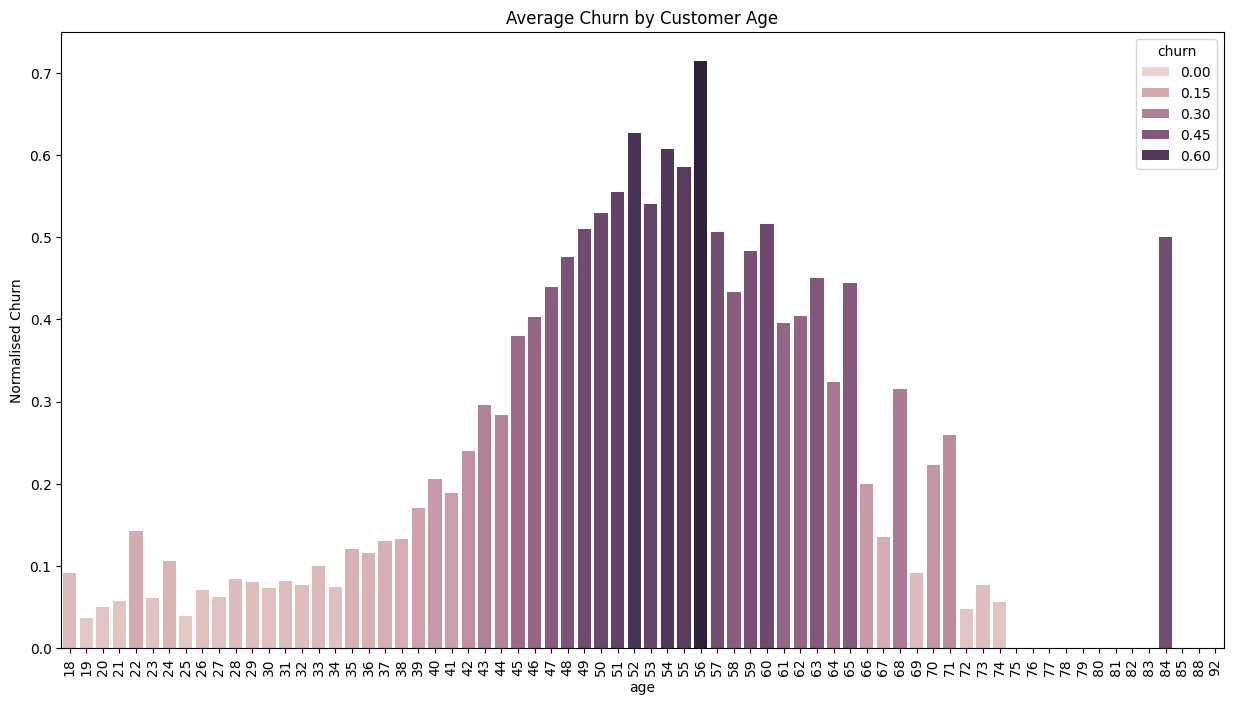

In [16]:
df_age = pd.DataFrame(df.groupby('age')['churn'].mean())

plt.figure(figsize=(15,8))
plt.xticks(rotation=90) 
sns.barplot(data=df_age, x=df_age.index, y=df_age['churn'], hue=df_age['churn'])
plt.ylabel("Normalised Churn") 
plt.title("Average Churn by Customer Age") 

# Refined Exploration - Age:

When taking a more focused approach to the predictor of age, there is a clear negative skew for the 'likelihood' of churn, as customers approach 'older age' (with a median age of 56 for the highest likelihood of customer churn). Further, the increase of customer churn appears to begin around the age of 39 and tapers off around 71 (although the later may be due to a lack of data points for these ages resulting in misleading insights).

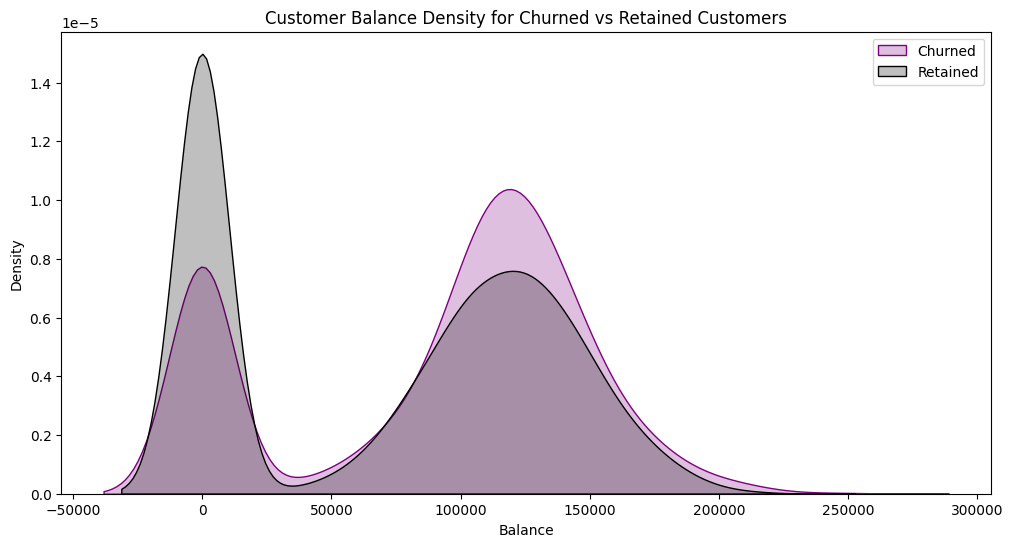

In [17]:
df_churned = df[df['churn'] == 1]
df_nchurned = df[df['churn'] == 0]

plt.figure(figsize=(12,6))
sns.kdeplot(df_churned['balance'], color='purple', label='Churned', fill=True)
sns.kdeplot(df_nchurned['balance'], color='black', label='Retained', fill=True)
plt.legend()
plt.xlabel('Balance')
plt.title('Customer Balance Density for Churned vs Retained Customers')
plt.show()

# Refined Exploration - Balance:

After further analysis, there appears to be a higher number of customers who have been retained by the bank who would be deemed 'small depositors'/'debtor Customers' than those who have churned. The opposite can be observed for the 'large depositors', whereby more have churned than have been retained. This could be due to many factors, such as customer behaviour/needs as a result of their standings as a depositor, the banks customer retention strategies, the bank's perceived risk of customers given their financial standing or Economic factors related to current market conditions such as interest rates or overall economic uncertainty.

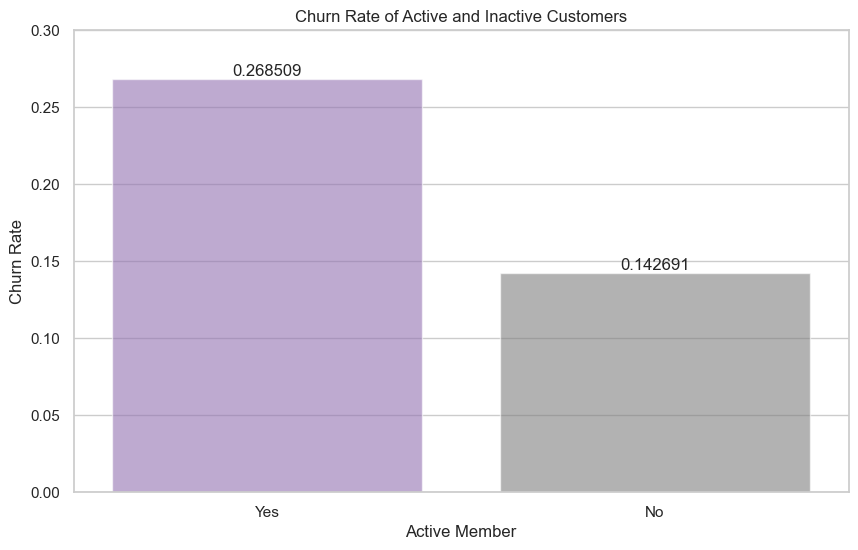

In [43]:
df.groupby('active_member')['churn'].mean() # There is a far higher churn rate by members who are active ( ~ 0.27) than inactive ( ~ 0.14).

custom_palette = {
    0: 'tab:purple',  # Color for inactive members
    1: 'tab:grey'  # Color for active members
}

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bplot = sns.barplot(df, x='active_member', y='churn', hue='active_member', palette=custom_palette, legend=False, errorbar=None, alpha=0.6)
ticks = bplot.get_xticks()
bplot.set_xticks(ticks)
bplot.set_xticklabels(['Yes', 'No'])
bplot.set_ylim(0, 0.3)
for i in bplot.containers:
    bplot.bar_label(i)
    
plt.title('Churn Rate of Active and Inactive Customers')
plt.xlabel('Active Member')
plt.ylabel('Churn Rate');



# Refined Exploration - Active/Inactive Members:

A higher chance of churn can be observed for active members of the bank. This in fact is common amongst different industries, given that the inactive members are sometime treated by businesses as 'idle' and so simply do not engage with their bank, obviously this is not always the case. Rather the banks active customers may have higher expectations and therefore if their expectations as a customer are not met, they may look elsewhere for investment/lending opportunities. Other factors may also be at play, such as service fatigue or simply the changing needs of the customer as their financial situation changes over time. It should be in the banks interest to adapt policy and targeted strategies to retain more active customers however, to increase opportunities to upsell products to said customer base. 

##### After 'drilling down' more deeply into key predictors (based off correlation coefficients). Greater insight into these proposed key predictors with respect to customer churn has been obtained. It has therefore been deemed appropriate to perform some final exploration into these predictors, with a focus on customer who do/do not own a credit card with the bank: 

##### - Exploration of Age and Churn by Credit Card Status
##### - Exploration of Balance and Churn by Credit Card Status
##### - Exploration of Active Member Status and Churn by Credit Card Status

Text(84.5, 0.97, 'Assumed Deceased Accounts')

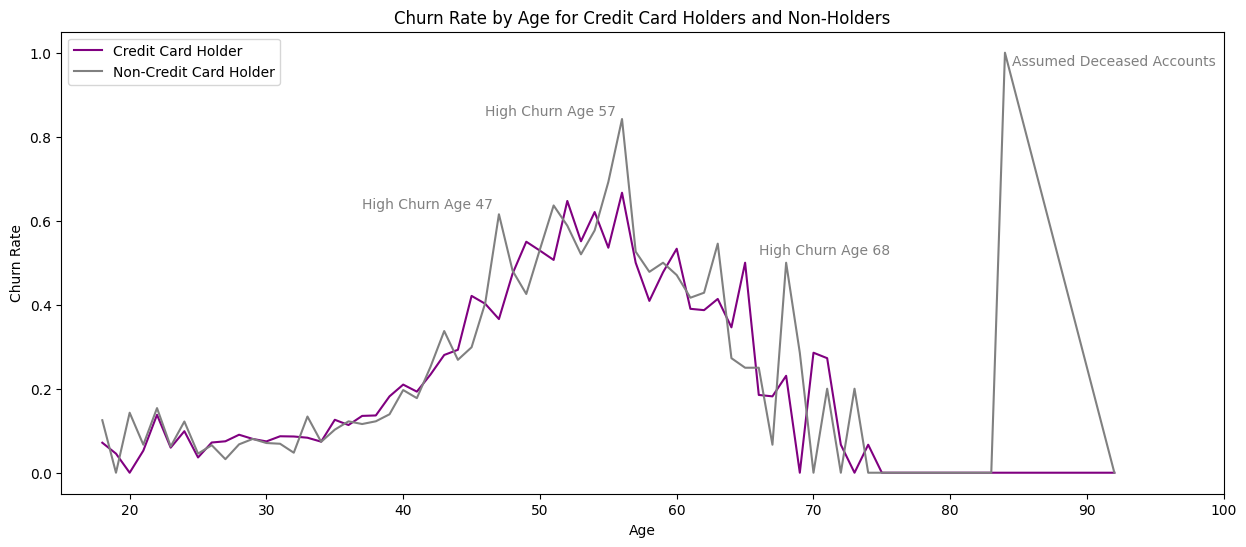

In [19]:
df_credit = df[df['credit_card'] == 1]
df_ncredit = df[df['credit_card'] == 0]

plt.figure(figsize=(15,6))
sns.lineplot(data=df_credit, x='age', y='churn', color='purple', errorbar=None, label='Credit Card Holder')
plt.xlim(15, 100)
sns.lineplot(data=df_ncredit, x='age', y='churn', color='grey', errorbar=None, label='Non-Credit Card Holder')
plt.xlim(15, 100)
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age for Credit Card Holders and Non-Holders')
plt.text(37, 0.63, s='High Churn Age 47', color='grey')
plt.text(46, 0.85, s='High Churn Age 57', color='grey')
plt.text(66, 0.52, s='High Churn Age 68', color='grey')
plt.text(84.5, 0.97, s='Assumed Deceased Accounts', color='grey')

#### Concluding Examinations of Churn Rate- Age and Credit Cards:
There can be an observed set of spikes in churn rate for non-holders for the ages of 47, 57 and 68. An irregular rise in churn was observed ages 65 and 70 for credit card holders. These changes given the sample size (2495 records) may be due to chance and so it would be of use to perform a significance test to determine as such. We will presume that these age groups display true higher churn and as a result these ages for non-credit and credit card holders should be targeted by the bank, to improve general customer retention and increase retained credit card customers. Further, Given that the churn of credit card holders occurs in their 'retirement period', there is opportunity for the bank to incorporate incentivised reward packages such as travel or health and wellness benefits to preserve more of said demographic. 

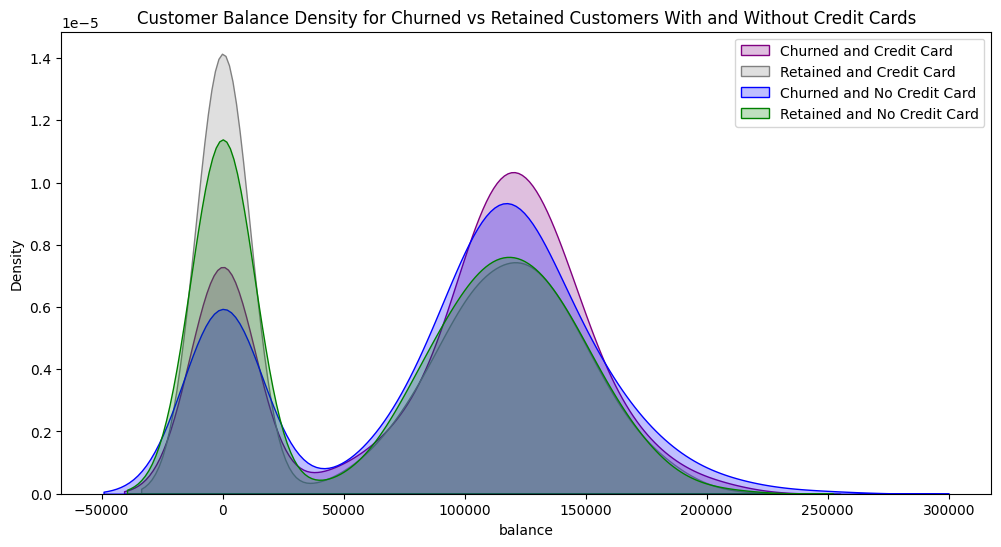

In [20]:
df_churn_credit = df_credit[df_credit['churn'] == 1]
df_nchurn_credit = df_credit[df_credit['churn'] == 0]
df_churn_ncredit = df_ncredit[df_ncredit['churn'] == 1]
df_nchurn_ncredit = df_ncredit[df_ncredit['churn'] == 0]

plt.figure(figsize=(12,6))
sns.kdeplot(df_churn_credit['balance'], color='purple', label='Churned and Credit Card', fill=True)
sns.kdeplot(df_nchurn_credit['balance'], color='grey', label='Retained and Credit Card', fill=True)
sns.kdeplot(df_churn_ncredit['balance'], color='blue', label='Churned and No Credit Card', fill=True)
sns.kdeplot(df_nchurn_ncredit['balance'], color='green', label='Retained and No Credit Card', fill=True)
plt.legend()
plt.xlabel('balance')
plt.title('Customer Balance Density for Churned vs Retained Customers With and Without Credit Cards')
plt.show()

#### Concluding Examinations of Churn Rate - Balance and Credit Cards:

<br>

##### From observation, the customer density order for 'small depositors' appears as follows:
***
1.) Retained and Credit Card holders
***
2.) Retained and not Credit Card holders
*** 
3.) Churned and Credit Card holders
*** 
4.) Churned and not Credit Card Holders 

<br>

##### From observation, the customer density order for 'large depositors' appears as follows:
***
1.) Churned and Credit Card holders
***
2.) Churned and not Credit Card holders
*** 
3.) Retained and not Credit Card holders
*** 
4.) Retained and Credit Card holders 



It appears that there is a higher density of retained small depositor customers, both with and without credit cards. Conversely, a higher density of large deposit customers, both with and without credit cards, are churning rather than being retained by the bank. This could be due to a greater focus by the bank on smaller depositors. The retention of small deposit customers suggests that the availability of credit cards has been an effective retention tool. On the other hand, the high churn of large depositors may not be a significant concern, as these customers are likely less reliant on credit cards as a source of capital, which could explain the higher density of churn among this customer segment. Overall, further analysis through predictive modelling using Multivariate Regression Analysis will help gain more insights for identifying customers at risk of churning.

Text(0, 0.5, 'Churn Rate')

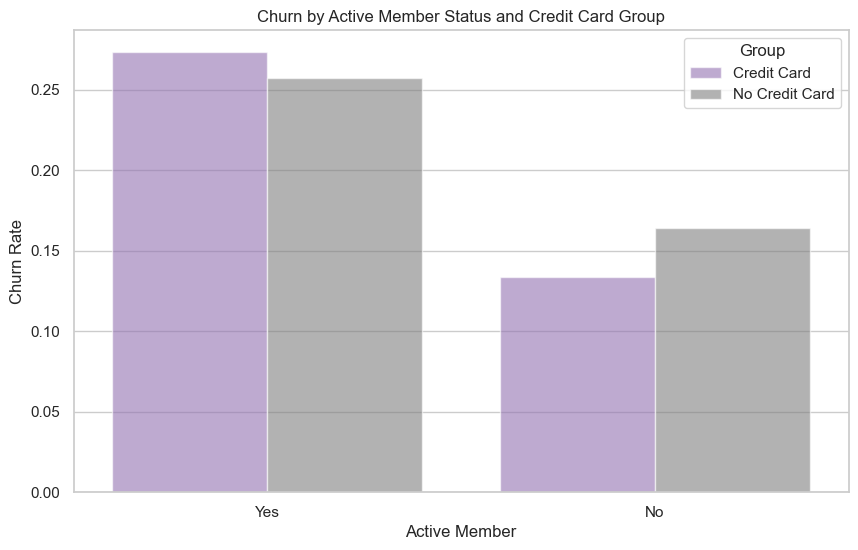

In [58]:
df_credit['Group'] = 'Credit Card'
df_ncredit['Group'] = 'No Credit Card'

df_combined = pd.concat([df_credit, df_ncredit])

custom_palette = {
    'Credit Card': 'tab:purple',  # Color for inactive members
    'No Credit Card': 'tab:grey'  # Color for active members
}

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
bplot = sns.barplot(data=df_combined, x='active_member', y='churn', hue='Group', palette=custom_palette, errorbar=None, alpha=0.6)
bplot.set_xticks(ticks)
bplot.set_xticklabels(['Yes', 'No'])
bplot.set_title('Churn by Active Member Status and Credit Card Group')
bplot.set_xlabel('Active Member')
bplot.set_ylabel('Churn Rate')


#### Concluding Examinations of Churn Rate - Balance and Credit Cards:
There appears to be a slightly higher churn rate for credit card customers who are active with the bank. When looking at inactive customers,  there is a large difference between the higher churn rate for customers who do not have a credit card compared to those who do. Overall it seems that the credit card may hold some influence on customer retention for inactive members. It would be of use to the bank to obtain greater customer segmentation insight so that expectations can be met for active members with a credit card to improve retention rates. This might be achieved through more personalised customers offerings, to increased percieved customer choice/bespoke features associated with the credit card. Lastly, it would be of use to the bank to perform further segmentation analysis to validate these findings. 

#### Next Steps:

#### To gain further understanding of customer churn amongst credit card holders, analysis through predictive modelling using Multivariate Regression Analysis will be undertaken. This may help in understanding the underlying drivers of churn behavior specific to credit card holders and provide a more rigorous method of analysis than data exploration alone.
